In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__


'0.9.0'

In [42]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Exploratory Data Analysis

In [43]:
train = data_train.copy()
test = data_test.copy()

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-nul

## Analysis Data Numeric and Category

In [47]:
# get letter on column 'cabin' value to categorize column 'cabin'
train['Cabin'] = train['Cabin'].str.get(0)
test['Cabin'] = test['Cabin'].str.get(0)

In [48]:
# split into numeric and categorical data for analysis purpose
num_data = train[['Age', 'SibSp', 'Parch', 'Fare']]
cat_data = train[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']]

### Analysis Data Numeric

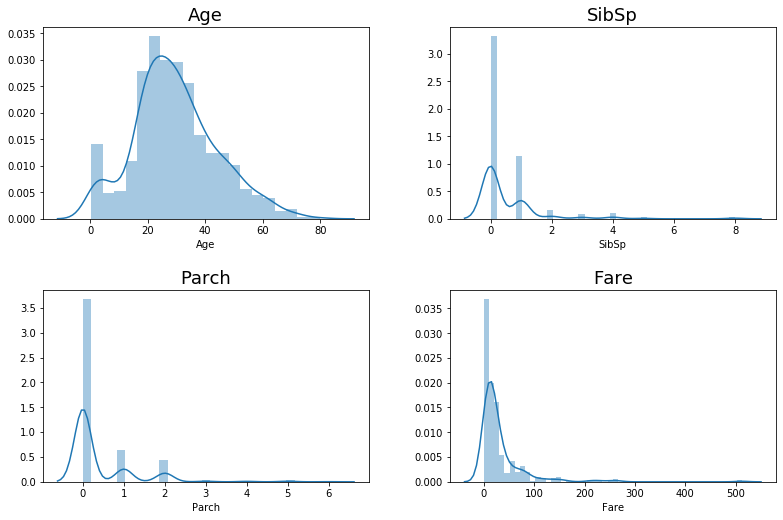

In [49]:
fig, ax = plt.subplots(2, 2 ,figsize = [12,8])
fig.tight_layout(pad=5.0)
# can use for loop, if to much columns
sns.distplot(ax = ax[0, 0], a = num_data['Age'].dropna())
ax[0, 0].set_title('Age', fontsize = 18)

sns.distplot(ax = ax[0, 1], a = num_data['SibSp'].dropna())
ax[0, 1].set_title('SibSp', fontsize = 18)

sns.distplot(ax = ax[1, 0], a = num_data['Parch'].dropna())
ax[1, 0].set_title('Parch', fontsize = 18)

sns.distplot(ax = ax[1, 1], a = num_data['Fare'].dropna())
ax[1, 1].set_title('Fare', fontsize = 18)

plt.show()

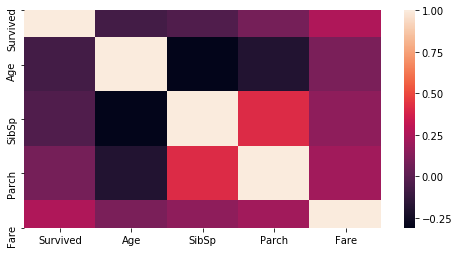

In [50]:
# heatmap data numeric, to prevent multicolinearity
heatmapdata = train[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]

cormat = heatmapdata.corr()
fig, ax = plt.subplots(figsize = [8,4])
sns.heatmap(data = cormat)
plt.show()

### Analysis Data Category

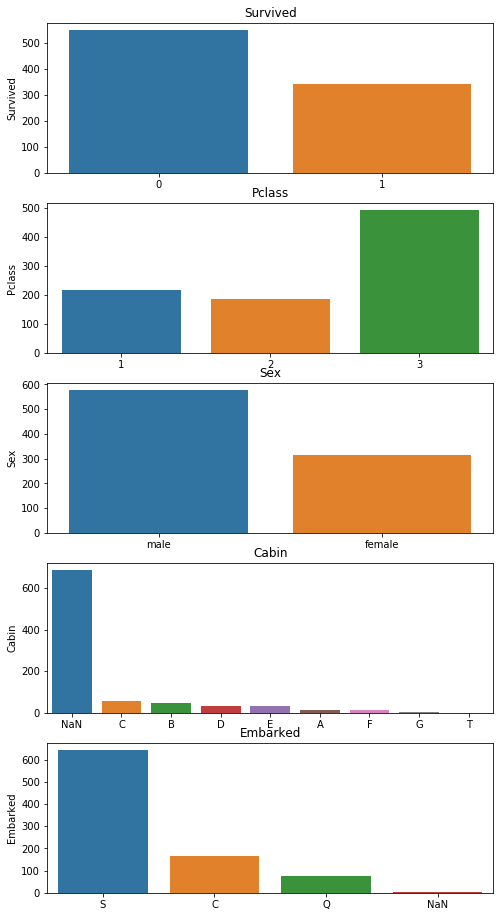

In [51]:
fig, ax = plt.subplots(cat_data.shape[1], 1, figsize = [8,16])
for i, n in enumerate(cat_data):
        sns.barplot(ax = ax[i], x = cat_data[n].fillna('NaN').value_counts().index, y = cat_data[n].fillna('NaN').value_counts())
        ax[i].set_title(n)
plt.show()

# Preprocessing Data

## Handle missing data

In [52]:
# create columns survived for same shape with training data
test.insert(1, 'Survived', -1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [53]:
print('Train :\n',train.isnull().sum())
print('\n')
print('Test :\n', test.isnull().sum())

Train :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Test :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [54]:
# handle missing data on column age (do the same on data test, but with mean of data train)
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(train['Age'].median(), inplace = True)

# we know test data have nan on fare, so we do this on train too (for easly understand)
train['Fare'].fillna(train['Fare'].median(), inplace = True)
test['Fare'].fillna(train['Fare'].median(), inplace = True)

# handle missing data on embarked columns
train.dropna(subset=['Embarked'] , inplace = True)

In [55]:
# Drop cabin because that's have many null/nan value
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

In [56]:
print('Train :\n',train.isnull().sum())
print('\n')
print('Test :\n', test.isnull().sum())

Train :
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Test :
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Cleaning data, Feature Engineer, etc on Each Column

### Create Column 'FamilySurvived' & 'FamilyDied'

In [57]:
# Create column family survived & died from column 'Name' (LastName)
train['LastName'] = train['Name'].str.split(',', expand=True)[0]
test['LastName'] = test['Name'].str.split(',', expand=True)[0]

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen


In [59]:
train[train['SibSp'] == 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,Rice
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S,Panula
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,S,Andersson
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,S,Panula
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,Q,Rice
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,S,Asplund
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,S,Asplund
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,S,Asplund
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,S,Panula


In [60]:
train['Train'] = 1
test['Train'] = 0

alldata = pd.concat((train, test), sort = False).reset_index(drop = True)

# From Ken Jee (https://www.youtube.com/watch?v=I3FBJdiExcg&t=1477s)
sur_data = []
died_data = []
for index, row in alldata.iterrows():
    s = alldata[(alldata['LastName']==row['LastName']) & (alldata['Survived']==1)]
    d = alldata[(alldata['LastName']==row['LastName']) & (alldata['Survived']==0)]
    
    s=len(s)
    if row['Survived'] == 1:
        s-=1

    d=len(d)
    if row['Survived'] == 0:
        d-=1
        
    sur_data.append(s)
    died_data.append(d)
    
alldata['FamilySurvived'] = sur_data
alldata['FamilyDied'] = died_data

In [61]:
alldata[alldata['LastName'] == 'Asplund']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,Train,FamilySurvived,FamilyDied
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S,Asplund,1,2,1
181,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,S,Asplund,1,3,0
232,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,S,Asplund,1,2,1
260,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,S,Asplund,1,2,1
1043,1046,-1,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,S,Asplund,0,3,1
1063,1066,-1,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,S,Asplund,0,3,1
1115,1118,-1,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,S,Asplund,0,3,1
1268,1271,-1,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,S,Asplund,0,3,1


In [62]:
alldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,Train,FamilySurvived,FamilyDied
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,1305,-1,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,Spector,0,0,0
1303,1306,-1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,0,0,0
1304,1307,-1,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,0,0,0
1305,1308,-1,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,Ware,0,0,0


In [63]:
train = alldata[alldata['Train'] == 1]
test = alldata[alldata['Train'] == 0]


### Cleaning Data on Column 'Age' and 'Fare'

In [64]:
# Remove outlier from data train
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
train = train[~((train['Age'] < (q1 - 1.5 * iqr)) | (train['Age'] > (q3+1.5*iqr)))]

q1=train['Fare'].quantile(0.25)
q3 = train['Fare'].quantile(0.75)
iqr = q3-q1
train = train[~ ((train['Fare'] < q1 - 1.5 * iqr) | (train['Fare'] > (q3 + 1.5 * iqr)))]

In [65]:
# Do log transform for column fare to make data into normal distribution
train['Fare'] = np.log(train['Fare']+1)
test['Fare'] = np.log(test['Fare']+1)

D:\application\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


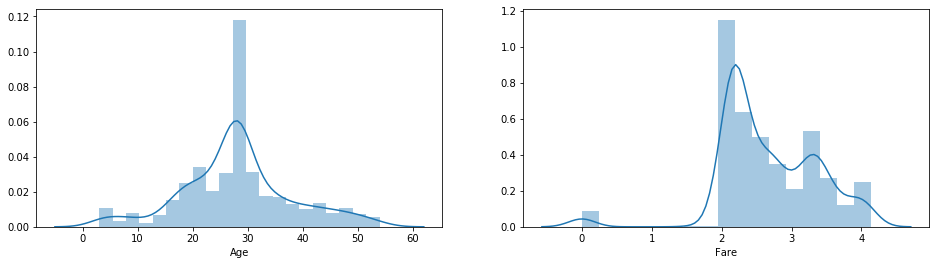

In [66]:
import seaborn as sns
fig, ax = plt.subplots(1, 2 ,figsize = [16,4])
sns.distplot(ax = ax[0], a = train['Age'])
sns.distplot(ax = ax[1], a = train['Fare'])
plt.show()

### Feature engineer on Column Which Type Category ('Pclass', 'Sex' & 'Embarked')

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,Train,FamilySurvived,FamilyDied
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,Braund,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,Heikkinen,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,Futrelle,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,Allen,1,1,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,2.246893,Q,Moran,1,1,1


In [68]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,Train,FamilySurvived,FamilyDied
889,892,-1,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,Q,Kelly,0,3,1
890,893,-1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,S,Wilkes,0,0,0
891,894,-1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,Q,Myles,0,0,0
892,895,-1,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,S,Wirz,0,0,0
893,896,-1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,S,Hirvonen,0,1,0


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['Pclass'])
train['Pclass'] = le.transform(train['Pclass'])
from sklearn.preprocessing import OneHotEncoder
# By dropping one of the one-hot encoded columns from each categorical feature, we ensure there are no "reference" columns—the remaining columns become linearly independent.
# https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html
# https://www.youtube.com/watch?v=g9aLvY8BfRM
ohe = OneHotEncoder(sparse = False, drop = 'first', categories = 'auto')
ohe.fit(train[['Sex', 'Embarked']])
ohecategory_train = ohe.transform(train[['Sex', 'Embarked']])
ohecategory_test = ohe.transform(test[['Sex', 'Embarked']])

for i in range(ohecategory_train.shape[1]):
    train['dummy_variable_' + str(i)] = ohecategory_train[:,i]

for i in range(ohecategory_test.shape[1]):
    test['dummy_variable_' + str(i)] = ohecategory_test[:,i]


print('Train shape :', train.shape)
print('Test shape :', test.shape)

Train shape : (718, 18)
Test shape : (418, 18)


D:\application\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [70]:
# https://benalexkeen.com/feature-scaling-with-scikit-learn/
# https://stats.stackexchange.com/questions/463690/multiple-regression-with-mixed-continuous-categorical-variables-dummy-coding-s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train[['Age', 'SibSp', 'Parch', 'Fare']])
train[['Age', 'SibSp', 'Parch', 'Fare']] = sc.transform(train[['Age', 'SibSp', 'Parch', 'Fare']])
test[['Age', 'SibSp', 'Parch', 'Fare']] = sc.transform(test[['Age', 'SibSp', 'Parch', 'Fare']])


D:\application\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\application\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,Train,FamilySurvived,FamilyDied,dummy_variable_0,dummy_variable_1,dummy_variable_2
0,1,0,2,"Braund, Mr. Owen Harris",male,-0.607611,0.686268,-0.40491,A/5 21171,-0.779352,S,Braund,1,0,1,1.0,0.0,1.0
2,3,1,2,"Heikkinen, Miss. Laina",female,-0.207827,-0.484137,-0.40491,STON/O2. 3101282,-0.668797,S,Heikkinen,1,0,0,0.0,0.0,1.0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.691688,0.686268,-0.40491,113803,1.864379,S,Futrelle,1,0,1,0.0,0.0,1.0
4,5,0,2,"Allen, Mr. William Henry",male,0.691688,-0.484137,-0.40491,373450,-0.649245,S,Allen,1,1,0,1.0,0.0,1.0
5,6,0,2,"Moran, Mr. James",male,-0.007934,-0.484137,-0.40491,330877,-0.587211,Q,Moran,1,1,1,1.0,1.0,0.0


In [72]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,Train,FamilySurvived,FamilyDied,dummy_variable_0,dummy_variable_1,dummy_variable_2
889,892,-1,3,"Kelly, Mr. James",male,0.641715,-0.484137,-0.404910,330911,-0.683968,Q,Kelly,0,3,1,1.0,1.0,0.0
890,893,-1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.891041,0.686268,-0.404910,363272,-0.822610,S,Wilkes,0,0,0,0.0,0.0,1.0
891,894,-1,2,"Myles, Mr. Thomas Francis",male,3.390233,-0.484137,-0.404910,240276,-0.415451,Q,Myles,0,0,0,1.0,1.0,0.0
892,895,-1,3,"Wirz, Mr. Albert",male,-0.107881,-0.484137,-0.404910,315154,-0.557184,S,Wirz,0,0,0,1.0,0.0,1.0
893,896,-1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.607611,0.686268,0.870202,3101298,-0.109345,S,Hirvonen,0,1,0,0.0,0.0,1.0


# Feature Selection

In [73]:
# See if train and test data have same shape and column position
print('Train columns :\n',train.columns)
print('Train shape : ', train.shape)
print('\n')
print('Test columns :\n',test.columns)
print('Test shape : ', test.shape)

Train columns :
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'LastName', 'Train',
       'FamilySurvived', 'FamilyDied', 'dummy_variable_0', 'dummy_variable_1',
       'dummy_variable_2'],
      dtype='object')
Train shape :  (718, 18)


Test columns :
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'LastName', 'Train',
       'FamilySurvived', 'FamilyDied', 'dummy_variable_0', 'dummy_variable_1',
       'dummy_variable_2'],
      dtype='object')
Test shape :  (418, 18)


In [74]:
# See & explore the data for dropping unused columns/features
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,Train,FamilySurvived,FamilyDied,dummy_variable_0,dummy_variable_1,dummy_variable_2
0,1,0,2,"Braund, Mr. Owen Harris",male,-0.607611,0.686268,-0.40491,A/5 21171,-0.779352,S,Braund,1,0,1,1.0,0.0,1.0
2,3,1,2,"Heikkinen, Miss. Laina",female,-0.207827,-0.484137,-0.40491,STON/O2. 3101282,-0.668797,S,Heikkinen,1,0,0,0.0,0.0,1.0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.691688,0.686268,-0.40491,113803,1.864379,S,Futrelle,1,0,1,0.0,0.0,1.0
4,5,0,2,"Allen, Mr. William Henry",male,0.691688,-0.484137,-0.40491,373450,-0.649245,S,Allen,1,1,0,1.0,0.0,1.0
5,6,0,2,"Moran, Mr. James",male,-0.007934,-0.484137,-0.40491,330877,-0.587211,Q,Moran,1,1,1,1.0,1.0,0.0


In [75]:
train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'LastName', 'Train'], axis = 1, inplace = True)
test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'LastName', 'Train'], axis = 1, inplace = True)

D:\application\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
print('Train columns :\n',train.columns)
print('Train shape : ', train.shape)
print('\n')
print('Test columns :\n',test.columns)
print('Test shape : ', test.shape)

Train columns :
 Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySurvived',
       'FamilyDied', 'dummy_variable_0', 'dummy_variable_1',
       'dummy_variable_2'],
      dtype='object')
Train shape :  (718, 11)


Test columns :
 Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySurvived',
       'FamilyDied', 'dummy_variable_0', 'dummy_variable_1',
       'dummy_variable_2'],
      dtype='object')
Test shape :  (418, 11)


In [77]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

print('X_train :\n', X_train[0:5])
print('y_train :\n', y_train[0:5])

X_train :
 [[ 2.         -0.60761099  0.68626782 -0.40491013 -0.77935204  0.
   1.          1.          0.          1.        ]
 [ 2.         -0.20782662 -0.48413668 -0.40491013 -0.66879745  0.
   0.          0.          0.          1.        ]
 [ 0.          0.6916882   0.68626782 -0.40491013  1.86437908  0.
   1.          0.          0.          1.        ]
 [ 2.          0.6916882  -0.48413668 -0.40491013 -0.64924532  1.
   0.          1.          0.          1.        ]
 [ 2.         -0.00793444 -0.48413668 -0.40491013 -0.58721139  1.
   1.          1.          1.          0.        ]]
y_train :
 [0 1 1 0 0]


# Model Prediction

In this section, i haved do some experiment with several machine learning algorithms like Naive Bayes, Logistic Regression, XGBoost, K-Nearest Neighbors, etc. I used GridSearchCV to find best parameter and accuracy from each algorithms, after that i implemented on data test and submitted the results prediction to kaggle. The best score i have is <b>0.79425 (top 9%)</b> with K-Nearest Neighbors algorithm (parameter : leaf_size = 1, metric = 'minkowski', n_neighbors = 12, p = 1, weights = 'distance')

### K-Nearest Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 12, p = 1, weights = 'distance')
accuracies = cross_val_score(clf, X_train, y_train, cv = 10)
print('Accuracies : ', accuracies)
print('AVG Accuracies : ', accuracies.mean())
print('STD/variance:',accuracies.std())


Accuracies :  [0.83333333 0.77777778 0.80555556 0.79166667 0.88888889 0.83333333
 0.83333333 0.79166667 0.83098592 0.85915493]
AVG Accuracies :  0.8245696400625977
STD/variance: 0.03212617106401504


In [79]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred = y_pred.astype('int64')

submission = pd.DataFrame()
submission['PassengerId'] = data_test['PassengerId']
submission['Survived'] = y_pred
submission['Survived'].value_counts()


0    288
1    130
Name: Survived, dtype: int64

In [80]:
submission.to_csv(r'Submission.csv', index = False, header = True)